# Matplotlib

Matplotlib (MATLAB plot library) – biblioteka do wizualizacji danych (powstała z inspiracji językiem MATLAB)

Instalacja biblioteki:                       

In [ ]:
%pip install matplotlib

Załadowanie bibliotek:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np              

C:\Users\Agnieszka\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Wczytanie danych:

In [2]:
data = pd.read_csv('StudentsPerformance.csv') 

data['parental level of education'] = data['parental level of education'].astype('category').cat.reorder_categories(['some high school',    
                                                                                                                     'high school',
                                                                                                                     'some college',
                                                                                                                     "associate's degree",
                                                                                                                     "bachelor's degree",
                                                                                                                     "master's degree"], ordered = True) 

Dane dotyczą wyników uczniów z kilku testów:

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(1), int64(3), object(4)
memory usage: 56.0+ KB


## Tworzenie wykresów

### Wykres liniowy

Podstawową funkcją bibllioteki matplotlib jest **plot**, który służy do tworzenia wykresów liniowych. \
Jej głównymi argumentami są listy x = [$x_1$, $x_2$, ... , $x_n$] i y = [$y_1$, $y_2$, ... , $y_n$], które definiują punkty tworzonego wykresu: $(x_1, y_1)$, $(x_2, y_2)$, ... , $(x_n, y_n)$, które zostaną na nim połączone. \
**show** wywołuje wykres z wszystkim, co zostało podane do wykresu do tego momentu.

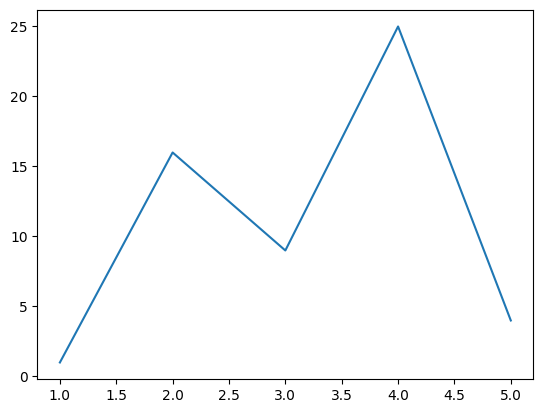

In [5]:
plt.plot([1, 2, 3, 4, 5], [1, 16, 9, 25, 4])
plt.show()

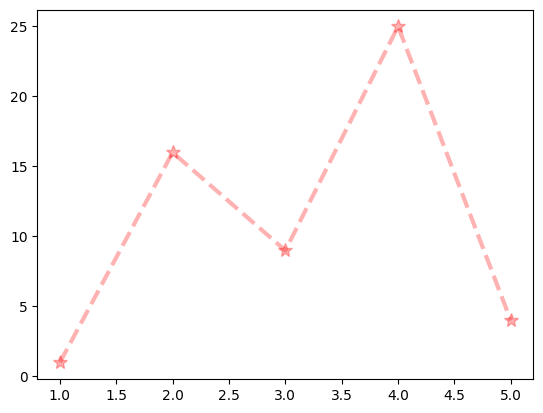

In [6]:
plt.plot([1, 2, 3, 4, 5], [1, 16, 9, 25, 4],
         linestyle  = 'dashed',                 # typ linii - przerywana
         linewidth  = 3,                        # grubość linii
         marker     = '*',                      # znacznik punktów
         markersize = 10,                       # wielkość znaczników punktów
         color      = 'red',                    # kolor 
         alpha      = 0.3)                      # przezroczystość
plt.show()

Więcej argumentów funkcji plot: \
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### Cechy wykresów

Załóżmy, że chcemy stworzyć wykres funkcji matematycznej. \
Do stworzenia listy argumentów możemy użyć numpy.arange lub numpy.linspace, natomiast do stworzenia listy wartości odpowiedniego jej przekształcenia za pomocą wzoru lub funkcji z pakietu numpy.

In [7]:
x  = np.arange(0, 3.01, 0.01)
y1 = np.sqrt(x)
y2 = x**2

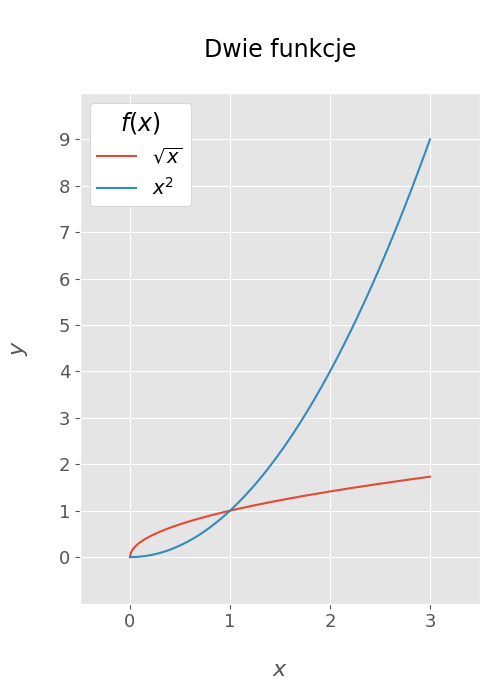

In [8]:
plt.style.use('ggplot')                           # styl wykresu - zbiór cech wyglądu przypisanych automatycznie do wybranego stylu (domyślnie jest 'default') - pozostaje po wywołaniu wykresu, aż do ponownej zmiany

plt.figure(figsize = (5, 7))                      # rozmiar wykresu: poziomo x pionowo (domyślnie jest 6 x 4)


plt.plot(x, y1, label = '$\\sqrt{x}$')            # label - etykieta wykresu do legendy
plt.plot(x, y2, label = '$x^2$')


plt.legend(title          = '$f(x)$',             # tytuł
           loc            = 'upper left',         # lokalizacja
           frameon        = True,                 # czy ma być ramka
           facecolor      = 'white',              # kolor tła
           framealpha     = 1,                    # przezroczystość tła
           fontsize       = 14,                   # rozmiar czcionki
           title_fontsize = 17)                   # rozmiar czcionki tytułu
 
plt.xlabel('\n$x$', size = 16)                    # podpis osi x lub y; rozmiar czcionki
plt.ylabel('$y$\n', size = 16)
plt.title('\nDwie funkcje\n', size = 17)          # tytuł

plt.xticks(np.arange(0, 4, 1), size = 13)         # punkty na osi x lub y
plt.yticks(np.arange(0, 10, 1), size = 13) 

plt.xlim(-0.5, 3.5)                               # przedział ujęty na osi x lub y
plt.ylim(-1, 10)

plt.tight_layout()                                # dopasowanie marginesów do zawartości wykresu
plt.savefig('przykladowy_wykres.png', dpi = 300)  # zapis wykresu do pliku o podanej nazwie i określonej jakości
plt.show()

Więcej funkcji w matplotlib: \
https://matplotlib.org/stable/api/pyplot_summary.html

---

# Ćwiczenie

Stwórz wykres funkcji logarytmu naturalnego (np.log) na przedziale (1, 5). \
Punkty na osi x niech będą co 1, a na osi y co 0,3.

---

# Wykresy rozkładu jednej zmiennej

## Zmienna nominalna

Rozkład zmiennej nominalnej można przedstawić na wykresie kołowym (funkcja pie) lub słupkowym (funkcja bar). \
Oba z nich tworzy się przez podanie częstości poszczególnych wartości, określając w ten sposób bezpośrednio wielkość "pie-ów" lub słupków.

### Wykres kołowy

**Tabela częstości:**

In [9]:
gender_freq = data['gender'].value_counts() 
gender_freq

gender
female    518
male      482
Name: count, dtype: int64

**Wykres surowy:**

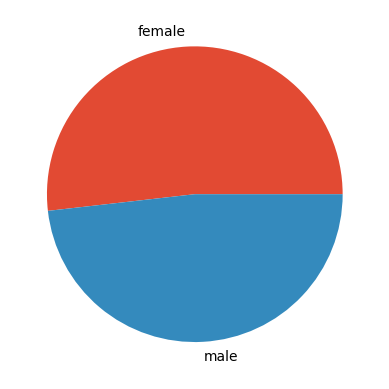

In [10]:
plt.pie(gender_freq, labels = gender_freq.index)
plt.show()

**Wykres gotowy:**

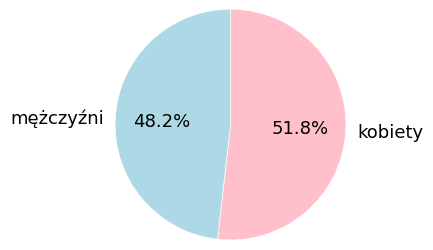

In [11]:
plt.figure(figsize = (4.2, 2.6))                                    


plt.pie(gender_freq, labels = ['kobiety', 'mężczyźni'],   # podajemy tabelę częstości
        startangle   = 90,                                # kąt rozpoczęcia wykresu - domyślnie jest 0 (od osi x)
        counterclock = False,                             # czy przeciwnie do ruchu wskazówek zegara
        autopct      = '%1.1f%%',                         # dodanie etykiet procentów
        radius       = 1.3,                               # promień
        colors       = ['pink', 'lightblue'],             # kolory
        wedgeprops   = {'edgecolor': 'white'},            # kolorowe krawędzie
        textprops    = {'fontsize': 13})                  # wielkość czcionki tekstu                


plt.tight_layout()
plt.savefig('kolowy_plec.png', dpi = 300)
plt.show()

### Wykres słupkowy

**Tabela częstości:**

In [12]:
race_freq = data['race/ethnicity'].value_counts()
race_freq

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

**Wykres surowy:**

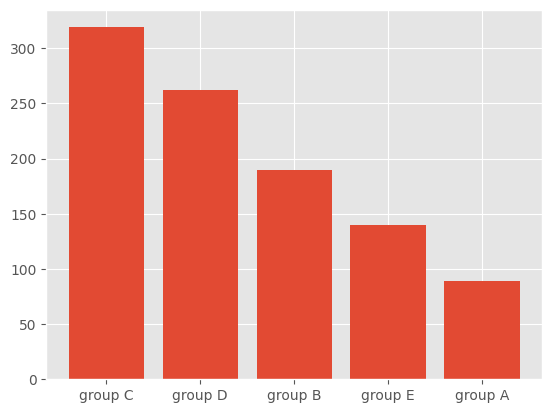

In [13]:
plt.bar(race_freq.index, race_freq)
plt.show()

**Wykres gotowy:**

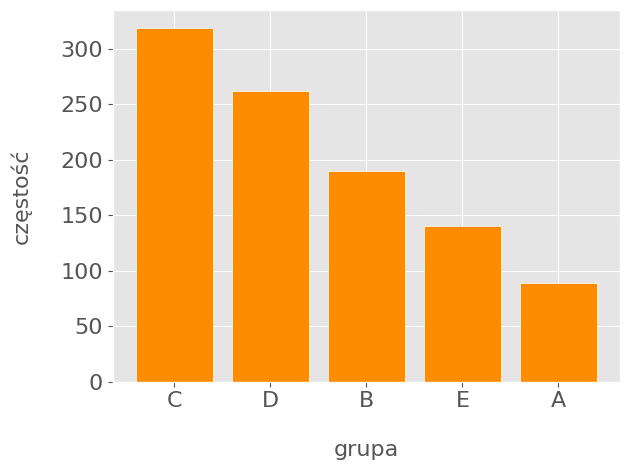

In [14]:
plt.bar(race_freq.index.str[-1], race_freq,                              # podajemy tabelę częstości
        color     = 'darkorange',
        edgecolor = 'white')


plt.xlabel('\ngrupa',    size = 16)                      
plt.ylabel('częstość\n', size = 16)

plt.xticks(size = 16)
plt.yticks(size = 16)

plt.tight_layout()
plt.savefig('slupkowy_grupa.png', dpi = 300)
plt.show()

## Zmienna porządkowa

Rozkład zmiennej porządkowej również można przedstawić na wykresie słupkowym, ale z etykietami w kolejności poziomów tej zmiennej.

### Wykres słupkowy

**Tabela krzyżowa** z uporządkowanymi poziomami:

In [15]:
eduction_freq = data['parental level of education'].value_counts(sort = False) 
eduction_freq 

parental level of education
some high school      179
high school           196
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

**Wykres surowy**:

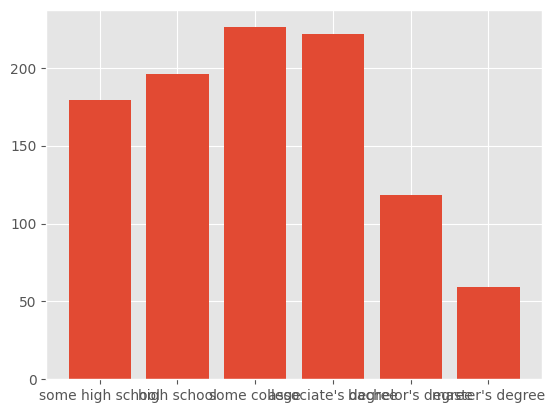

In [16]:
plt.bar(eduction_freq.index, eduction_freq)
plt.show()

Problem: ?

Rowiązanie 1:

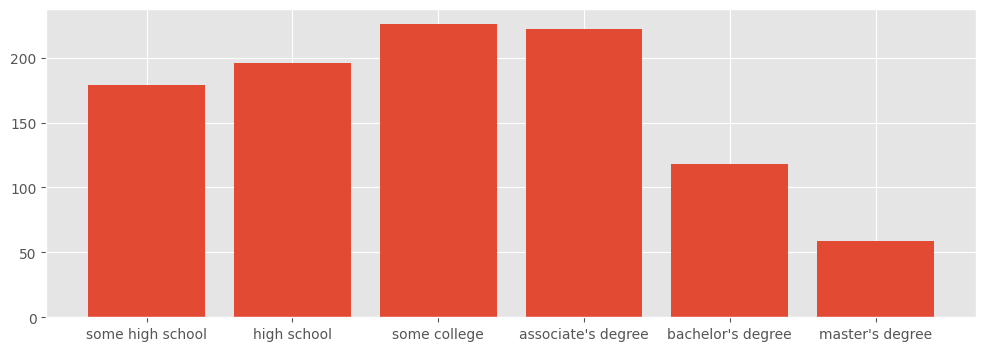

In [17]:
plt.figure(figsize = (12, 4))

plt.bar(eduction_freq.index, eduction_freq)
plt.show()

Rozwiązanie 2: 

In [18]:
education_levels = ['some\nhigh\nschool',
                    'high\nschool',
                    'some\ncollege',
                    "associate's\ndegree",
                    "bachelor's\ndegree",
                    "master's\ndegree"]

**Wykres gotowy:**

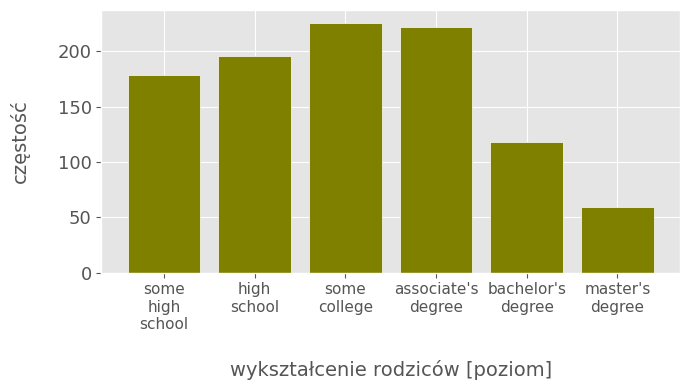

In [19]:
plt.figure(figsize = (7, 4))


plt.bar(education_levels, eduction_freq,
        color     = 'olive',
        edgecolor = 'white')


plt.xlabel('\nwykształcenie rodziców [poziom]', size = 14)                      
plt.ylabel('częstość\n',                        size = 14)

plt.xticks(size = 11)
plt.yticks(size = 13)

plt.tight_layout()
plt.savefig('slupkowy_wyksztalcenie.png', dpi = 300)
plt.show()

## Zmienna ilościowa

Rozkład zmiennej ilościowej można przedstawić na histogramie lub wykresie pudełkowym.

### Histogram

Histogram podobnie jak wykres słupkowy przedstawia w postaci słupków częstość poszczególnych wartości, jednak nie dla każdej z osobna, a należących wspólnie do przedziału.

Histogram może być **częstościowy** lub **gęstościowy** w zależności od tego, co przedstawia jego oś y.

Oś y histogramu częstościowego, analogicznie do wykresu słupkowego, przedstawia liczbę obserwacji znajdujących się w danym przedziale. \
Oś y histogramu gęstościowego przedstawia natomiast ich odsetek wśród wszystkich obserwacji - jest przeskalowana tak, by pole wszystkich słupków wynosiło 1. 

Pozostałe elementy obu typów histogramów są takie same - histogram gęstościowy jest tylko znormalizowaną wersją histogramu częstościowego.

**Statystyki opisowe zmiennej:**

In [20]:
data['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

**Wykres surowy:**

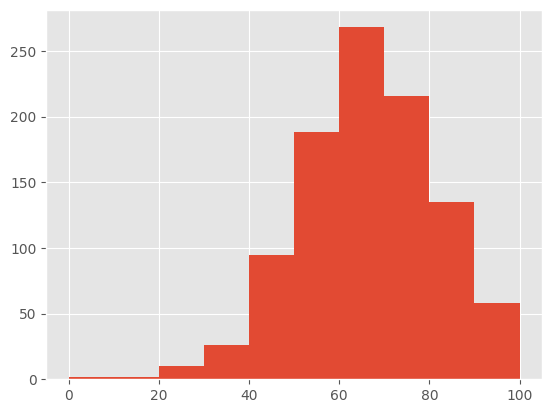

In [21]:
plt.hist(data['math score'])
plt.show()

**Wykres gotowy:**

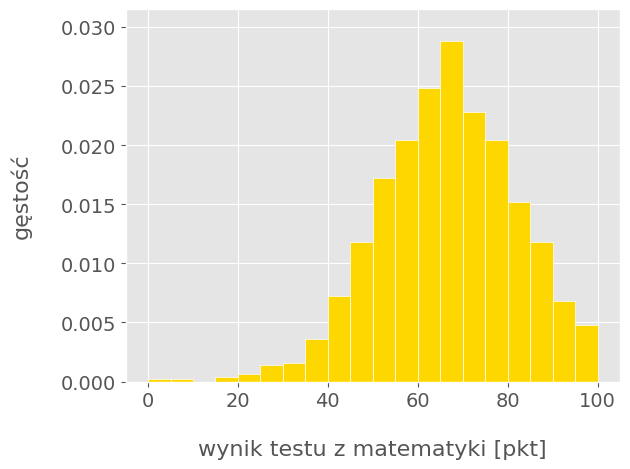

In [22]:
plt.hist(data['math score'],                               # podajemy całą zmienną
         bins      = np.arange(0, 101, 5),                 # lista punktów wyznaczających granice przedziałów 
         density   = True,                                 # czy histogram gęstościowy             
         color     = 'gold',
         edgecolor = 'white')


plt.xlabel('\nwynik testu z matematyki [pkt]', size = 16)             
plt.ylabel('gęstość\n',                        size = 16)

plt.xticks(size = 14)
plt.yticks(size = 14)

plt.ylim(0, 0.0315)

plt.tight_layout()                                                                                                                                         
plt.savefig('histogram_matematyka.png', dpi = 300)  
plt.show()

### Wykres pudełkowy

Wykres pudełkowy jest wykresem jednowymiarowym, przedstawiającym na osi kwantyle rozkładu zmiennej ilościowej oraz jego wartości odstające.

Linie tworzące granice pudełka to kwartyle $Q_1$, $Q_2$ (mediana), $Q_3$.

Wąsy wykresu odchodzą od $Q_1$ i $Q_3$ o 1,5 wartości rozstępu międzykwartylowego lub do odpowiednio najmniejszej lub największej wartości zaobserwowanej w danych.

Obserwacje, które znajdą się poza wąsami wykresu - obserwacje odstające zmiennej, oznacza się kropkami.

          Q1 - 1.5 IQR        Q1  mediana  Q3         Q3 + 1.5 IQR
              
                               |-----|-----| 
         o     |---------------|     |     |---------------|     o  o
                               |-----|-----| 
                           
      wartość                  <----------->                   wartości
     odstająca                      IQR                       odstające

**Kwantyle rozkładu zmiennej:**

In [23]:
data['math score'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      0.0
0.25     57.0
0.50     66.0
0.75     77.0
1.00    100.0
Name: math score, dtype: float64

**Wykres surowy:**

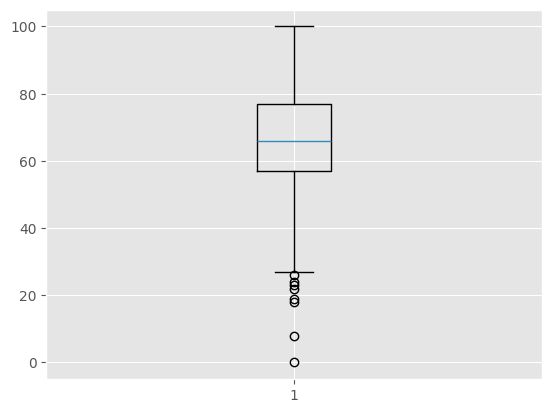

In [24]:
plt.boxplot(data['math score'])                                               
plt.show()

**Wykres gotowy:**

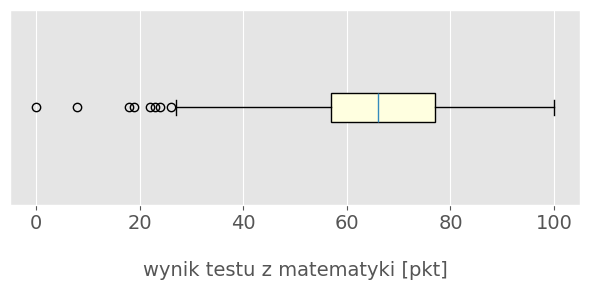

In [25]:
plt.figure(figsize = (6, 3))


plt.boxplot(data['math score'],                                                    # podajemy całą zmienną
            orientation = 'horizontal',                                            # poziomo
            boxprops    = {'facecolor':'lightyellow'}, patch_artist = True)        # kolor pudełka 


plt.xlabel('\nwynik testu z matematyki [pkt]', size = 14)

plt.xticks(size = 14)
plt.yticks([])                                                                     # usunięcie punktów na osi y

plt.tight_layout()
plt.savefig('pudelkowy_matematyka.png', dpi = 300)
plt.show()

---

# Ćwiczenie

1. Stwórz wykres **kołowy** rozkładu zmiennej race/ethnicity.

2. Stwórz wykres rozkładu zmiennej reading score.

---

# Wykresy rozkładów dwóch zmiennych

## Zmienna ilościowa vs zmienna ilościowa

Rozkład dwóch zmiennych ilościowych względem siebie można przedstawić na przykład za pomocą wykresu rozrzutu.

### Wykres rozrzutu

Jeśli mamy zmienne x i y, których wartości w kolumnie to odpowiednio: [$x_1$, $x_2$, ... , $x_n$] i [$y_1$, $y_2$, ... , $y_n$], to punkty $(x_1, y_1)$, $(x_2, y_2)$, ... , $(x_n, y_n)$ na układzie współrzędnych, tworzą ich wykres rozrzutu.

**Statystyki opisowe zmiennych:**

In [26]:
data[['math score', 'math score']].describe()

,math score,math score
count,1000.00000,1000.00000
mean,66.08900,66.08900
std,15.16308,15.16308
min,0.00000,0.00000
25%,57.00000,57.00000
50%,66.00000,66.00000
75%,77.00000,77.00000
max,100.00000,100.00000


**Wykres surowy:**

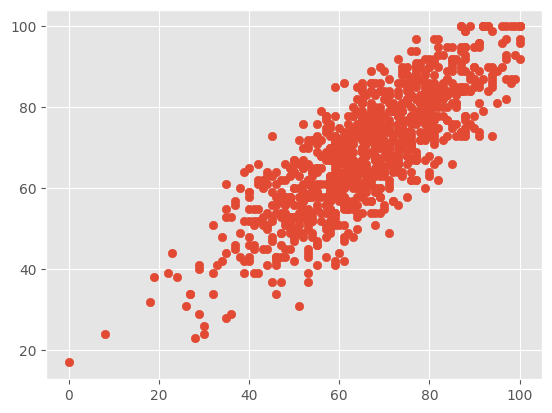

In [27]:
plt.scatter(data['math score'], data['reading score'])
plt.show()

**Wykres gotowy:**

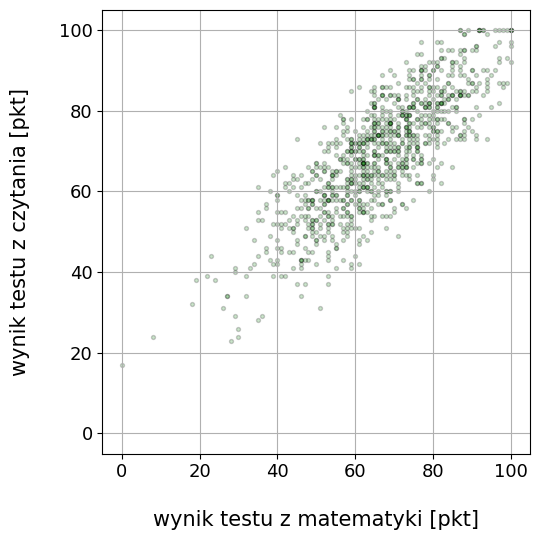

In [28]:
plt.style.use('default')

plt.figure(figsize = (5.5, 5.5)) 
plt.grid(True)


plt.scatter(data['math score'], data['reading score'],      # podajemy całe zmienne
            color     = 'green',
            edgecolor = 'black',
            alpha     = 0.2,
            s         = 8)                                  # rozmiar punktów


plt.xlabel('\nwynik testu z matematyki [pkt]', size = 15)
plt.ylabel('wynik testu z czytania [pkt]\n',   size = 15)

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.ylim(-5, 105)

plt.tight_layout()
plt.savefig('rozrzutu_matematyka_czytanie.png', dpi = 300)
plt.show()

plt.style.use('ggplot')

## Zmienna porządkowa vs zmienna porządkowa

Rozkład dwóch zmiennych porządkowych względem siebie można przedstawić na przykład za pomocą mapy ciepła.

### Mapa ciepła

Mapa ciepła, analogicznie do wykresu słupkowego, pokazuje częstość danej pary wartości tych zmiennych, jednak przedstawia to za pomocą nie wysokości słupka dla poszczególnych wartości na osi, a określonego odcienia koloru na przestrzeni osi obu zmiennych. \
Argumentem funkcji imshow, tworzącej mapę ciepła, jest tabela krzyżowa obu zmiennych.

Ze względu na tylko jedną zmienną porządkową w danych, na potrzeby przykładu, tworzę poniżej trychotomizację zmiennej ilościowej.

In [29]:
reading_level = data['reading score'].map(lambda x: 'high'   if x > 80 else (
                                                    'medium' if x > 60 else
                                                    'low')).astype('category').cat.reorder_categories(['low', 'medium', 'high'], ordered = True) 
reading_level.value_counts()

reading score
medium    490
low       275
high      235
Name: count, dtype: int64

**Tabela krzyżowa:**

In [30]:
reading_education_freq = pd.crosstab(reading_level, data['parental level of education'])     
reading_education_freq

parental level of education,some high school,high school,some college,associate's degree,bachelor's degree,master's degree
reading score,,,,,,
low,58,73,58,53,23,10
medium,81,98,114,112,60,25
high,40,25,54,57,35,24


**Wykres surowy:**

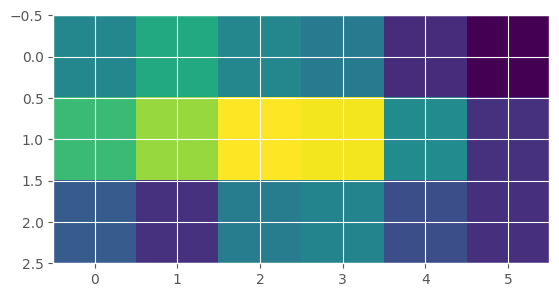

In [31]:
plt.imshow(reading_education_freq)
plt.show()

**Wykres gotowy:**

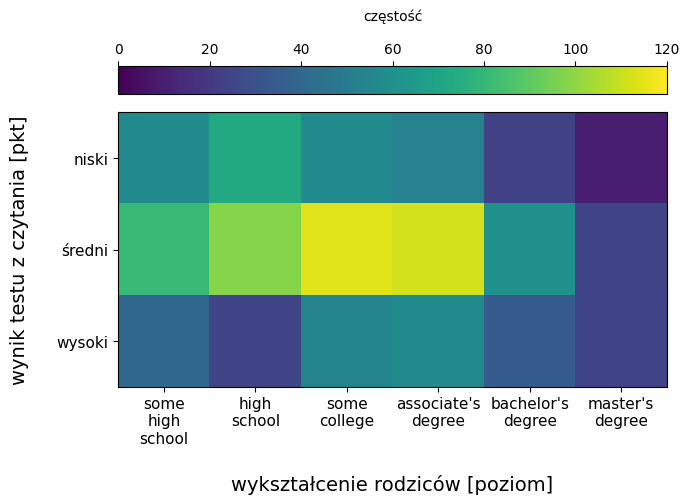

In [32]:
plt.style.use('default')

plt.figure(figsize = (7, 5))


plt.imshow(reading_education_freq,                             # podajemy tabelę krzyżową
           vmin = 0, vmax = 120)                               # przedział wartości częstości, na których rozpięta ma być skala odcieni


plt.colorbar(orientation = 'horizontal',                       # ustawienia paska kolorów
             location    = 'top',
             label       = 'częstość\n')

plt.xlabel('\nwykształcenie rodziców [poziom]', size = 14)
plt.ylabel('wynik testu z czytania [pkt]\n',    size = 14)

plt.xticks(np.arange(0, 6, 1), education_levels,              size = 11)               # podpisanie punktów w przestrzeni poziomami zmiennych
plt.yticks(np.arange(0, 3, 1), ['niski', 'średni', 'wysoki'], size = 11)

plt.tight_layout()
plt.savefig('ciepla_wyksztalcenie_czytanie.png', dpi = 300)
plt.show()

plt.style.use('ggplot')

## Zmienna ilościowa vs zmienna porządkowa

Rozkład zmiennej ilościowej względem zmiennej porządkowej można przedstawić agregując zmienną ilościową dla poziomów zmiennej porządkowej, a następnie przedstawiając to na wykresie słupkowym. Innym rozwiązaniem jest stworzenie panelu wykresów rozkładu zmiennej ilościowej (histogramów lub wykresów pudełkowych), gdzie kolejne z nich odpowiadają kolejnym poziomom zmiennej porządkowej.

### Wykres słupkowy

**Rozkład zmiennej ilościowej względem zmiennej porządkowej:**

In [35]:
writing_education_stats = data.groupby('parental level of education', observed = False)['writing score'].agg(['mean', 'std'])
writing_education_stats

,mean,std
parental level of education,,
some high school,64.888268,15.736197
high school,62.448980,14.085907
some college,68.840708,15.012331
associate's degree,69.896396,14.311122
bachelor's degree,73.381356,14.728262
master's degree,75.677966,13.730711


**Wykres:**

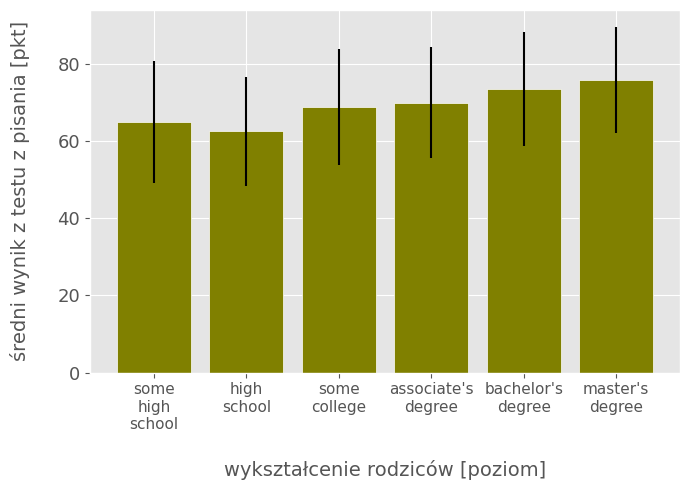

In [36]:
plt.figure(figsize = (7, 5))


plt.bar(education_levels, writing_education_stats['mean'],
        yerr      = writing_education_stats['std'],                              # odchylenia standardowe
        color     = 'olive',
        edgecolor = 'white')


plt.xlabel('\nwykształcenie rodziców [poziom]',      size = 14)                      
plt.ylabel('średni wynik z testu z pisania [pkt]\n', size = 14)

plt.xticks(size = 11)
plt.yticks(size = 13)

plt.tight_layout()
plt.savefig('slupkowy_wyksztalcenie_pisanie.png', dpi = 300)
plt.show()

### Panel wykresów pudełkowych

**Podzbiory zmiennej ilościowej względem zmiennej porządkowej:**

Zmienna porządkowa w postaci rangowej:

In [36]:
parental_level_of_education_ranks = data['parental level of education'].factorize(sort = True)[0] + 1
parental_level_of_education_ranks

array([5, 3, 6, 4, 3, 4, 3, 3, 2, 2, 4, 4, 2, 3, 6, 1, 2, 1, 6, 4, 2, 3,
       3, 1, 5, 6, 3, 5, 2, 6, 3, 3, 6, 3, 3, 4, 4, 1, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 2, 4, 2, 3, 4, 3, 2, 1, 2, 4, 4, 3, 1, 5, 1, 4, 4, 1, 1,
       1, 3, 4, 4, 3, 3, 4, 1, 1, 4, 1, 5, 1, 6, 4, 2, 3, 4, 2, 3, 3, 4,
       3, 1, 5, 2, 2, 4, 3, 4, 1, 3, 3, 5, 3, 5, 4, 2, 3, 3, 6, 4, 4, 1,
       4, 2, 4, 3, 5, 2, 5, 5, 1, 3, 5, 4, 3, 2, 3, 2, 1, 3, 6, 5, 6, 1,
       3, 3, 5, 5, 1, 2, 4, 3, 1, 3, 3, 2, 3, 3, 1, 4, 5, 4, 1, 5, 4, 5,
       1, 3, 2, 3, 4, 4, 4, 3, 6, 2, 6, 5, 2, 6, 2, 3, 2, 1, 3, 4, 5, 6,
       2, 4, 6, 1, 6, 3, 2, 4, 1, 4, 2, 1, 1, 5, 4, 3, 1, 3, 6, 4, 1, 2,
       3, 5, 4, 3, 4, 4, 3, 1, 5, 2, 3, 3, 1, 3, 2, 4, 2, 1, 4, 2, 2, 1,
       2, 4, 1, 1, 4, 6, 3, 2, 1, 3, 3, 4, 5, 1, 5, 4, 5, 1, 3, 4, 2, 5,
       2, 3, 1, 4, 4, 2, 2, 2, 1, 3, 1, 6, 2, 3, 4, 4, 3, 6, 1, 3, 1, 2,
       2, 1, 5, 2, 4, 3, 5, 3, 4, 3, 3, 5, 1, 2, 1, 5, 2, 2, 5, 3, 1, 4,
       4, 1, 5, 1, 4, 1, 1, 5, 2, 4, 1, 4, 2, 4, 3,

Podzbiór zmiennej ilościowej dla wybranego poziomu zmiennej porządkowej:

In [37]:
data.loc[parental_level_of_education_ranks == 2, 'writing score']

8      67
9      50
12     73
16     86
20     63
       ..
985    54
990    75
994    62
996    55
997    65
Name: writing score, Length: 196, dtype: int64

Lista podzbiorów zmiennej ilościowej względem zmiennej porządkowej:

In [64]:
writing_edulevels_list = [data.loc[parental_level_of_education_ranks == rank, 'writing score']
                          for rank in range(1, 7)]                              # lista składana z pętlą po rangach zmiennej porządkowej

**Wykres surowy:**

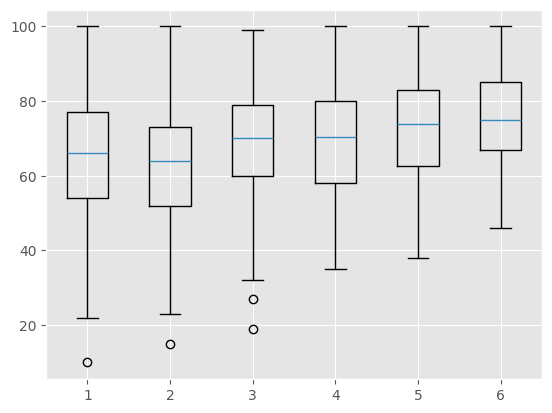

In [39]:
plt.boxplot(writing_edulevels_list) 
plt.show()

**Wykres gotowy:**

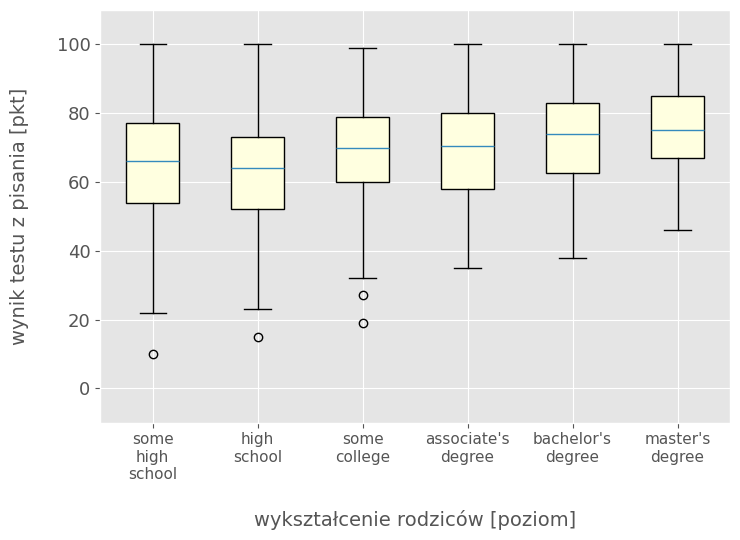

In [40]:
plt.figure(figsize = (7.5, 5.5))

plt.boxplot(writing_edulevels_list,                                             # podajemy listę podzbiorów zmiennej ilościowej, dla których mają być stworzone wykresy
            tick_labels = education_levels,                                     # podpisanie punktów na osi y poziomami zmiennej porządkowej
            boxprops    = {'facecolor':'lightyellow'}, patch_artist = True) 


plt.xlabel('\nwykształcenie rodziców [poziom]', size = 14)
plt.ylabel('wynik testu z pisania [pkt]\n',     size = 14)

plt.xticks(size = 11)
plt.yticks(size = 13)

plt.ylim(-10, 110)

plt.tight_layout()
plt.savefig('pudelkowy_wyksztalcenie_pisanie.png', dpi = 300)
plt.show()

## Zmienna ilościowa vs zmienna nominalna

Aby przedstawić rozkład zmiennej ilościowej względem zmiennej nominalnej możemy skorzystać z podobnego zbioru wykresów, co dla rozkładu tej zmiennej względem zmiennej porządkowej - wykonać agregację zmiennej dla każdego poziomu zmiennej nominalnej lub skorzystać z panelu wykresów dla poszczególnych z nich, a także, przy mniejszej liczbie poziomów, można przedstawić kilka rozkładów zmiennej ilościowej na jednym wykresie.

### Wykres słupkowy

**Rozkład zmiennej ilościowej względem zmiennej nominalnej:**

In [37]:
writing_course_stats = data.groupby('test preparation course')['writing score'].agg(['mean', 'std'])
writing_course_stats

,mean,std
test preparation course,,
completed,74.418994,13.375335
none,64.504673,14.999661


**Wykres:**

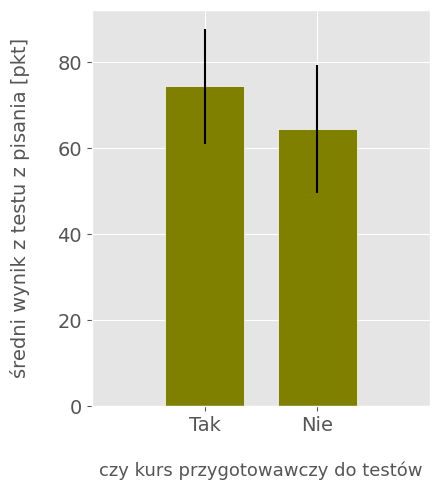

In [38]:
plt.figure(figsize = (4.5, 5))


plt.bar(['Tak', 'Nie'], writing_course_stats['mean'],
        yerr      = writing_course_stats['std'],
        width     = 0.7,
        color     = 'olive',
        edgecolor = 'white')


plt.xlabel('\nczy kurs przygotowawczy do testów',    size = 13)                      
plt.ylabel('średni wynik z testu z pisania [pkt]\n', size = 14)

plt.xticks(size = 14)
plt.yticks(size = 14)

plt.xlim(-1, 2)

plt.tight_layout()
plt.savefig('slupkowy_kurs_pisanie.png', dpi = 300)
plt.show()

### Panel wykresów pudełkowych

**Kwantyle rozkładu zmiennej dla grup:**

In [43]:
data.groupby('test preparation course')['writing score'].quantile([0, 0.25, 0.5, 0.75, 1])

test preparation course      
completed                0.00     36.0
                         0.25     66.0
                         0.50     76.0
                         0.75     83.0
                         1.00    100.0
none                     0.00     10.0
                         0.25     54.0
                         0.50     65.0
                         0.75     74.0
                         1.00    100.0
Name: writing score, dtype: float64

**Podzbiory zmiennej ilościowej względem zmiennej nominalnej:**

In [44]:
writing_course_yes = data.loc[data['test preparation course'] == 'completed', 'writing score']
writing_course_no  = data.loc[data['test preparation course'] == 'none',      'writing score']

**Wykres surowy:**

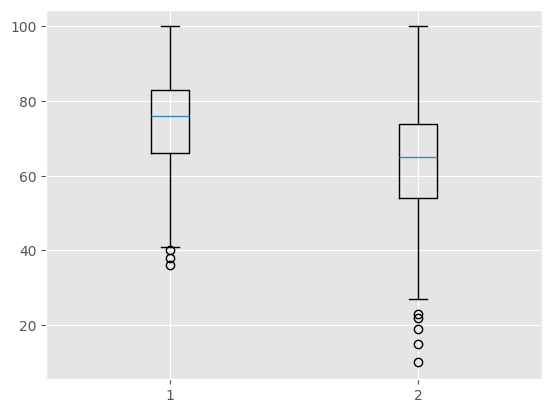

In [45]:
plt.boxplot([writing_course_yes, writing_course_no]) 
plt.show()

**Wykres gotowy:**

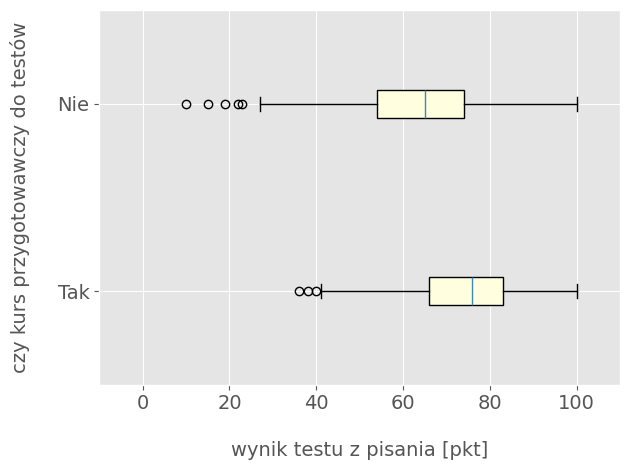

In [46]:
plt.boxplot([writing_course_yes, writing_course_no],                              # podajemy listę podzbiorów zmiennej ilościowej, dla których mają być stworzone wykresy
            tick_labels = ['Tak', 'Nie'],                                         # podpisanie punktów na osi y poziomami zmiennej nominalnej
            orientation = 'horizontal',
            boxprops    = {'facecolor':'lightyellow'}, patch_artist = True) 


plt.xlabel('\nwynik testu z pisania [pkt]',       size = 14)
plt.ylabel('czy kurs przygotowawczy do testów\n', size = 14)

plt.xticks(size = 14)
plt.yticks(size = 14)                                     

plt.xlim(-10, 110)

plt.tight_layout()
plt.savefig('pudelkowy_pisanie_kurs.png', dpi = 300)
plt.show()

### Histogramy nakładające się

**Wykres surowy:**

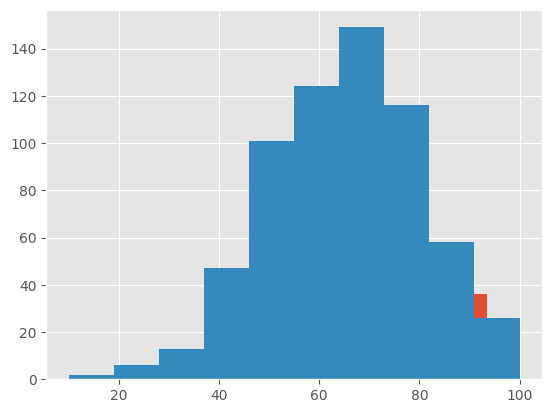

In [47]:
plt.hist(writing_course_yes)                           
plt.hist(writing_course_no)   

plt.show()

**Wykres gotowy:**

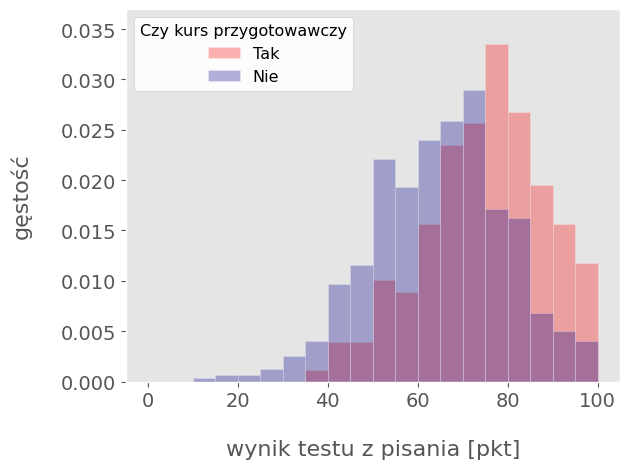

In [48]:
bins = np.arange(0, 101, 5)               


plt.grid(False)                                               # usunięcie siatki ze względu na prześwitywanie pod przezroczystością wykresów

plt.hist(writing_course_yes,
         bins      = bins,
         density   = True,                                    # histogram podwójny powinnien być gęstościowy, a więc znormalizowany, żeby zrównoważyć nierówność grup
         color     = 'red',
         edgecolor = 'white',
         alpha     = 0.3,                                     # przezroczystość, żeby widać było drugi z wykresów
         label     = 'Tak')                           
plt.hist(writing_course_no,
         bins      = bins,
         density   = True,
         color     = 'darkblue',
         edgecolor = 'white',
         alpha     = 0.3,
         label     = 'Nie')   


plt.legend(title          = 'Czy kurs przygotowawczy',
           title_fontsize = 11.5,
           fontsize       = 11.5,
           facecolor      = 'white',
           framealpha     = 0.9,
           loc            = 'upper left')

plt.xlabel('\nwynik testu z pisania [pkt]', size = 16)             
plt.ylabel('gęstość\n',                     size = 16)

plt.xticks(size = 14)
plt.yticks(size = 14)

plt.ylim(0, 0.037)

plt.tight_layout()
plt.savefig('histogram_pisanie_kurs.png', dpi = 300)
plt.show()

## Zmienna porządkowa vs zmienna nominalna

Gdy chcemy zwizualizować rozkład zmiennej porządkowej względem zmiennej nominalnej, tak jak przy zmiennej ilościowej, możemy przedstawić to przy pomocy kilku rozkładów na jednym wykresie lub skorzystać z panelu wykresów (słupkowych), a także tak jak przy dwóch zmiennych porządkowych, jeśli zmienna nominalna ma wiele poziomów, skorzystać ewentualnie z mapy ciepła.

### Wykres słupkowy skumulowany

**Tabela krzyżowa zmiennych:**

In [66]:
education_lunch_freq = pd.crosstab(data['parental level of education'], data['lunch']    # jako pierwsza zmienna porządkowa, jako druga zmienna nominalna    
                                  #).apply(lambda x: x / x.sum()                         # gdy chcemy na osi y odsetki obserwacji dla porównania grup (raczej do słupkowego grupowanego)
                                  ).reset_index()     
education_lunch_freq

lunch,parental level of education,free/reduced,standard
0,some high school,0.171831,0.182946
1,high school,0.197183,0.195349
2,some college,0.222535,0.227907
3,associate's degree,0.216901,0.224806
4,bachelor's degree,0.123944,0.114729
5,master's degree,0.067606,0.054264


**Wykres:**

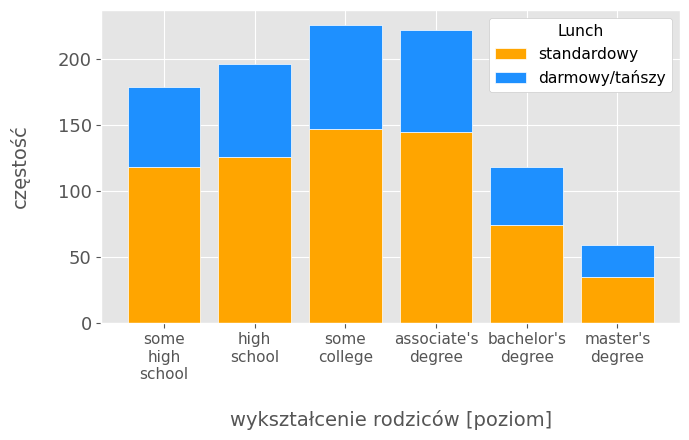

In [50]:
plt.figure(figsize = (7, 4.5))


plt.bar(education_levels, education_lunch_freq['standard'],    
        color     = 'orange',
        edgecolor = 'white',
        label     = 'standardowy')                   
plt.bar(education_levels, education_lunch_freq['free/reduced'], 
        color     = 'dodgerblue',
        edgecolor = 'white',
        label     = 'darmowy/tańszy',
        bottom    = education_lunch_freq['standard'])             # "przesunięcie" wykresu nad wykres podanej zmiennej


plt.legend(title          = 'Lunch',
           title_fontsize = 11.2,
           fontsize       = 11.2,
           facecolor      = 'white',
           framealpha     = 1,                    
           loc            = 'upper right')

plt.xlabel('\nwykształcenie rodziców [poziom]', size = 14) 
plt.ylabel('częstość\n',                        size = 14)

plt.xticks(size = 11)
plt.yticks(size = 13)

plt.tight_layout()
plt.savefig('slupkowy_wyksztalcenie_lunch.png', dpi = 300)
plt.show()

### Wykres słupkowy grupowany

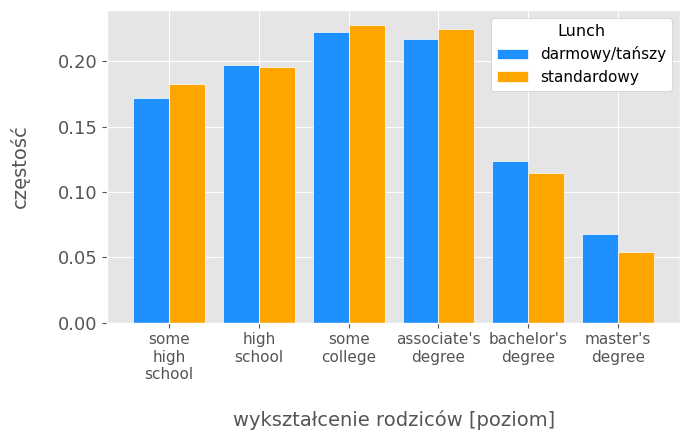

In [67]:
x_points  = np.arange(0, 6, 1)                                     # punkty na osi x, w których znajdą się słupki pierwszej z grup
width_bar = 0.4                                                    # szerokość słupków


plt.figure(figsize = (7, 4.5))


plt.bar(x_points, education_lunch_freq['free/reduced'],
        width     = width_bar,                                     # szerokość słupka
        color     = 'dodgerblue',
        edgecolor = 'white',
        label     = 'darmowy/tańszy')              
plt.bar(x_points + width_bar, education_lunch_freq['standard'],    # przesunięcie słupków drugiej z grup (o szerokość słupka)
        width     = width_bar,
        color     = 'orange',
        edgecolor = 'white',
        label     = 'standardowy')                   


plt.legend(title          = 'Lunch',
           title_fontsize = 11.5,
           fontsize       = 11,
           facecolor      = 'white',
           framealpha     = 1,
           loc            = 'upper right')

plt.xlabel('\nwykształcenie rodziców [poziom]', size = 14) 
plt.ylabel('częstość\n',                        size = 14)

plt.xticks(x_points + width_bar/2, education_levels, size = 11)    # przesunięcie punktów na osi x na środek słupków (o połowę słupka)
plt.yticks(size = 13)

plt.tight_layout()
plt.savefig('slupkowy_grp_wyksztalcenie_lunch.png', dpi = 300)
plt.show()

## Zmienna nominalna vs zmienna nominalna

Rozkład dwóch zmiennych nominalnych względem siebie można przedstawić podobnie jak rozkład zmiennej porządkowej względem innej zmiennej porządkowej lub zmiennej nominalnej - za pomocą mapy ciepła lub wykresów słupkowych, takich jak wyżej (skumulowanych lub grupowanych). Inną opcją, z której można skorzystać, jest na przykład panel wykresów kołowych.

Jeśli obie zmienne mają wiele poziomów, to spośród tych możliwości najbardziej preferowaną opcją ze względu na czytelność, będzie często mapa ciepła, natomiast najmniej preferowaną - wykres słupkowy skumulowany lub grupowany. W pozostałych przypadkach wybór będzie prawdopodobnie zależał od konkretnej charakterystyki danych.

---

# Wykres panelowy

Jeśli chcemy zwizualizować pewien rozkład względem zmiennej nominalnej, która ma więcej niż 2 poziomy, lub zmiennej porządkowej, możemy skorzystać z tzw. wykresu panelowego, który jest w rzeczywistości po prostu panelem wykresów. \
Możemy w ten sposób stworzyć m.in. panel histogramów, wykresów słupkowych, wykresów kołowych, a także dowolnych kilku wykresów.

### Zmienna ilościowa vs zmienna nominalna o więcej niż 2 poziomach

**Panel histogramów**

Tworzenie wykresu panelowego polega na dodawaniu kolejnych wykresów w odpowiednich miejscach siatki pól o określonej liczbie wierszy oraz kolumn, deklarując za każdym razem pole poprzez funkcję **subplot**.

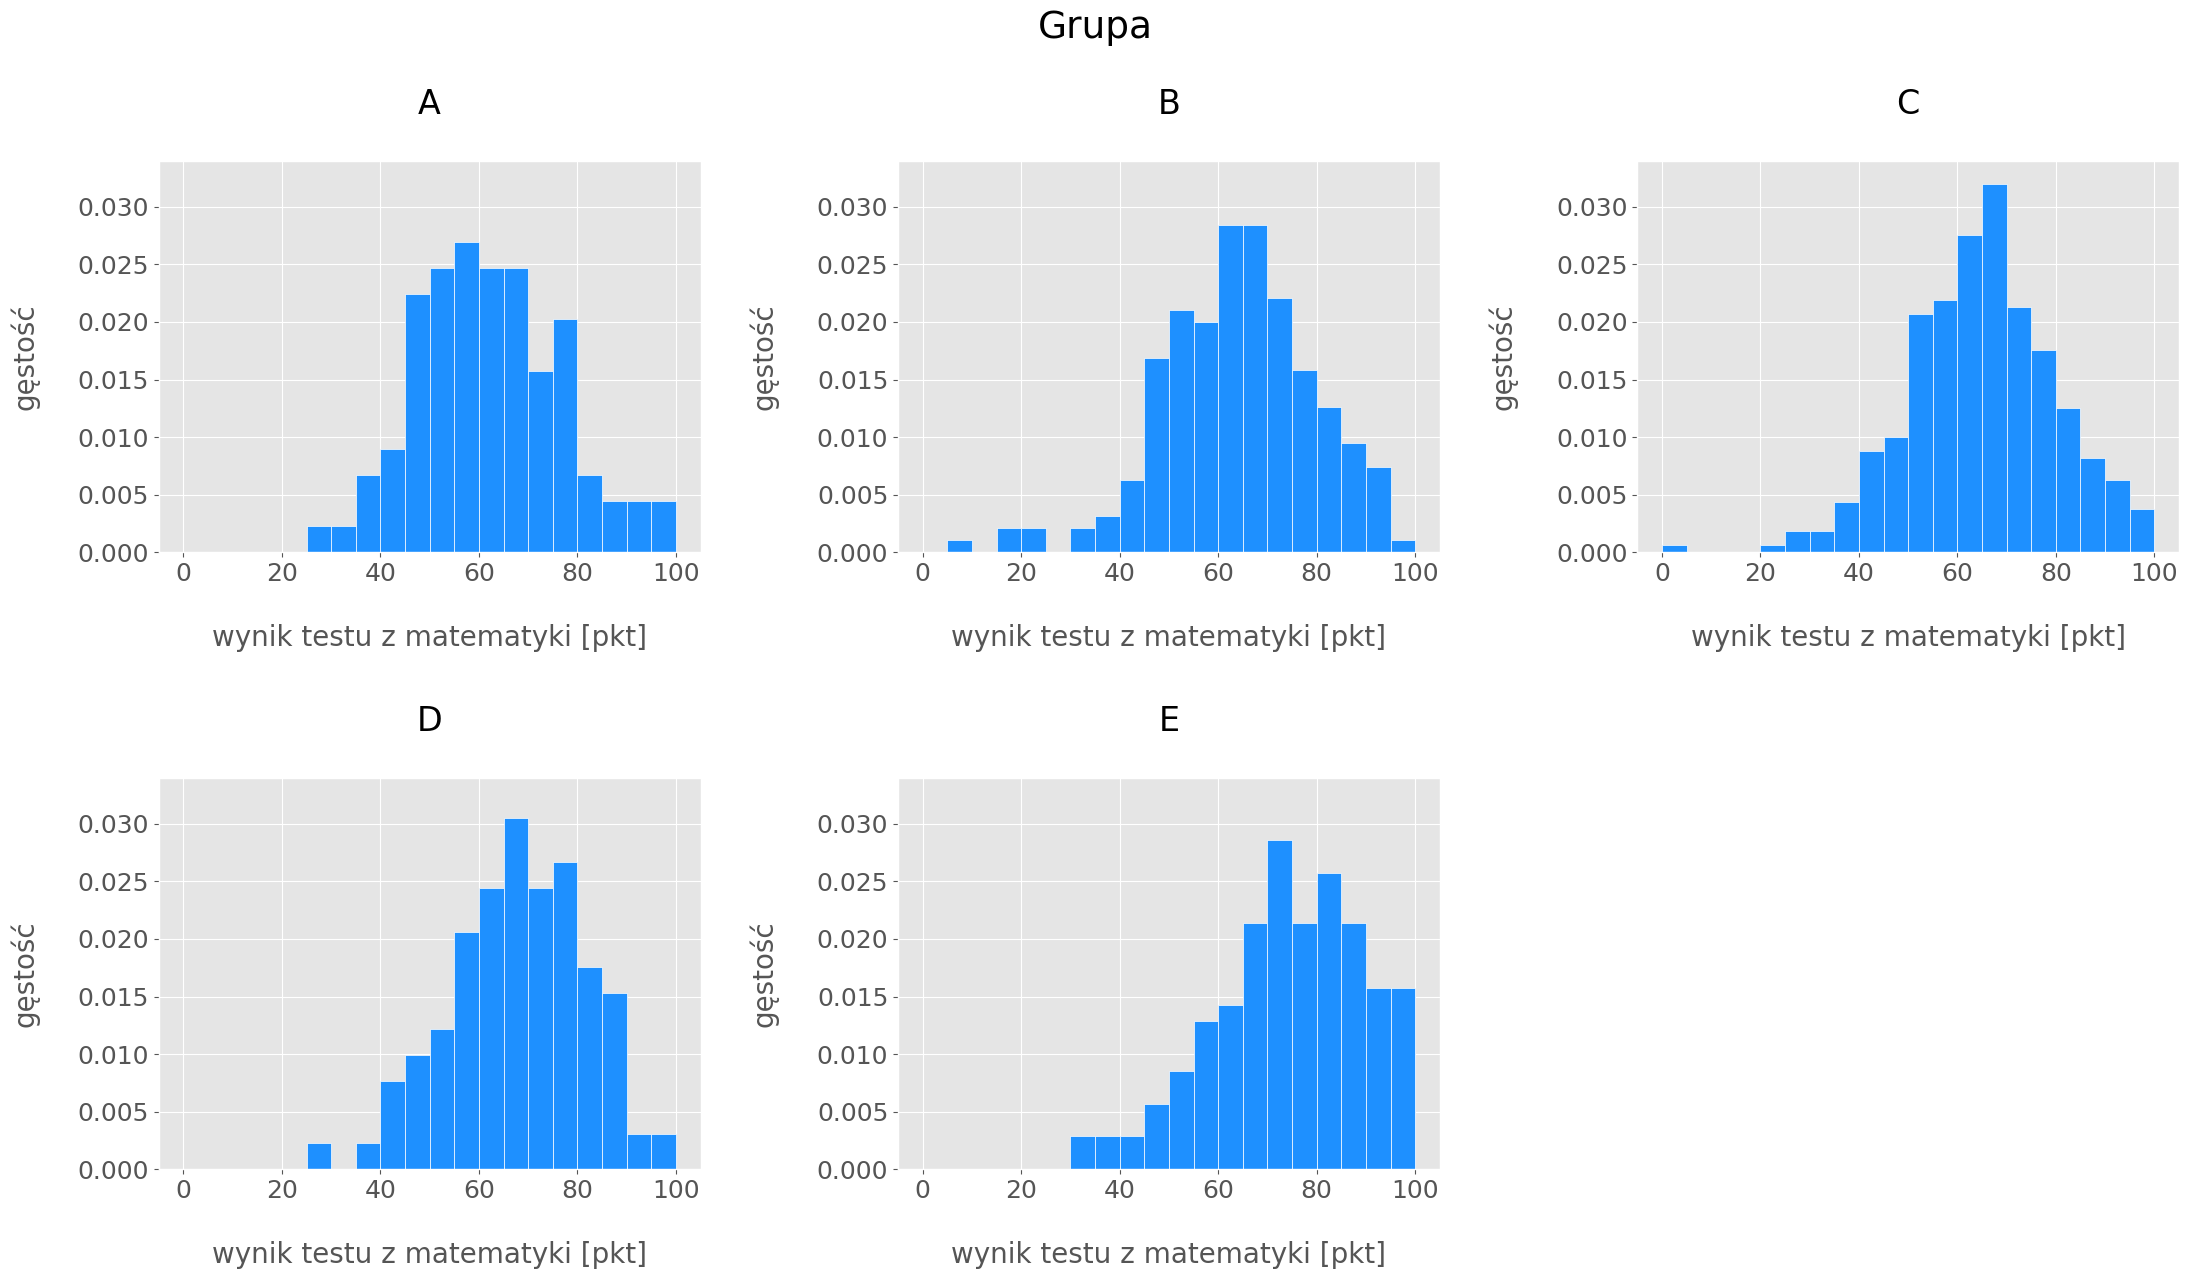

In [52]:
plt.figure(figsize = (22, 13))


plt.subplot(2, 3, 1)                                                        # rozpoczęcie 1. pola wykresu w siatce o układzie 2 × 3 (numeracja idzie do prawej i w dół)

plt.hist(data.loc[data['race/ethnicity'] == 'group A', 'math score'],       # kod wykresu
    bins      = np.arange(0, 101, 5),
    density   = True,
    color     = 'dodgerblue',
    edgecolor = 'white')                                                          # brak argumentu alpha i label, bo już niepotrzebne
plt.xlabel('\nwynik testu z matematyki [pkt]', size = 20)
plt.ylabel('gęstość\n',                        size = 20)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylim(0, 0.034)
plt.title('\nA\n', size = 24)                                                     # podpis wykresu - tu poziomu zmiennej grupującej


plt.subplot(2, 3, 2)                                                        # rozpoczęcie 2. pola wykresu

plt.hist(data.loc[data['race/ethnicity'] == 'group B', 'math score'],       # kod wykresu
    bins      = np.arange(0, 101, 5),
    density   = True,
    color     = 'dodgerblue',
    edgecolor = 'white')
plt.xlabel('\nwynik testu z matematyki [pkt]', size = 20)
plt.ylabel('\ngęstość\n',                      size = 20)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylim(0, 0.034)
plt.title('\nB\n', size = 24)


plt.subplot(2, 3, 3)

plt.hist(data.loc[data['race/ethnicity'] == 'group C', 'math score'],
    bins      = np.arange(0, 101, 5),
    density   = True,
    color     = 'dodgerblue',
    edgecolor = 'white')
plt.xlabel('\nwynik testu z matematyki [pkt]', size = 20)
plt.ylabel('\ngęstość\n',                      size = 20)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylim(0, 0.034)
plt.title('\nC\n', size = 24)


plt.subplot(2, 3, 4)

plt.hist(data.loc[data['race/ethnicity'] == 'group D', 'math score'],
    bins      = np.arange(0, 101, 5),
    density   = True,
    color     = 'dodgerblue',
    edgecolor = 'white')
plt.xlabel('\nwynik testu z matematyki [pkt]', size = 20)
plt.ylabel('gęstość\n',                        size = 20)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylim(0, 0.034)
plt.title('\nD\n', size = 24)


plt.subplot(2, 3, 5)

plt.hist(data.loc[data['race/ethnicity'] == 'group E', 'math score'],
    bins      = np.arange(0, 101, 5),
    density   = True,
    color     = 'dodgerblue',
    edgecolor = 'white')
plt.xlabel('\nwynik testu z matematyki [pkt]', size = 20)
plt.ylabel('\ngęstość\n',                      size = 20)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylim(0, 0.034)
plt.title('\nE\n', size = 24)


plt.suptitle('Grupa', size = 27)                                                    # tytuł panelu - tu zmiennej grupującej                                           


plt.tight_layout()
plt.savefig('panel_matematyka_grupa.png', dpi = 300)
plt.show()

Jeśli wykresy są powtarzalne, można to zautomatyzować, uzupełniając panel w pętli:

In [53]:
data_mapped = data.assign(group = data['race/ethnicity'].str[-1])             # ramka ze zmienionymi poziomami zmiennej

var_summed         = 'math score'                                             # nazwa zmiennej ilościowej
var_grouping       = 'group'                                                  # nazwa zmiennej nominalnej

var_summed_label   = 'wynik testu z matematyki [pkt]'                         # podpis zmiennej ilościowej (podpis osi x)
var_grouping_label = 'Grupa'                                                  # podpis zmiennej nominalnej (tytuł panelu)

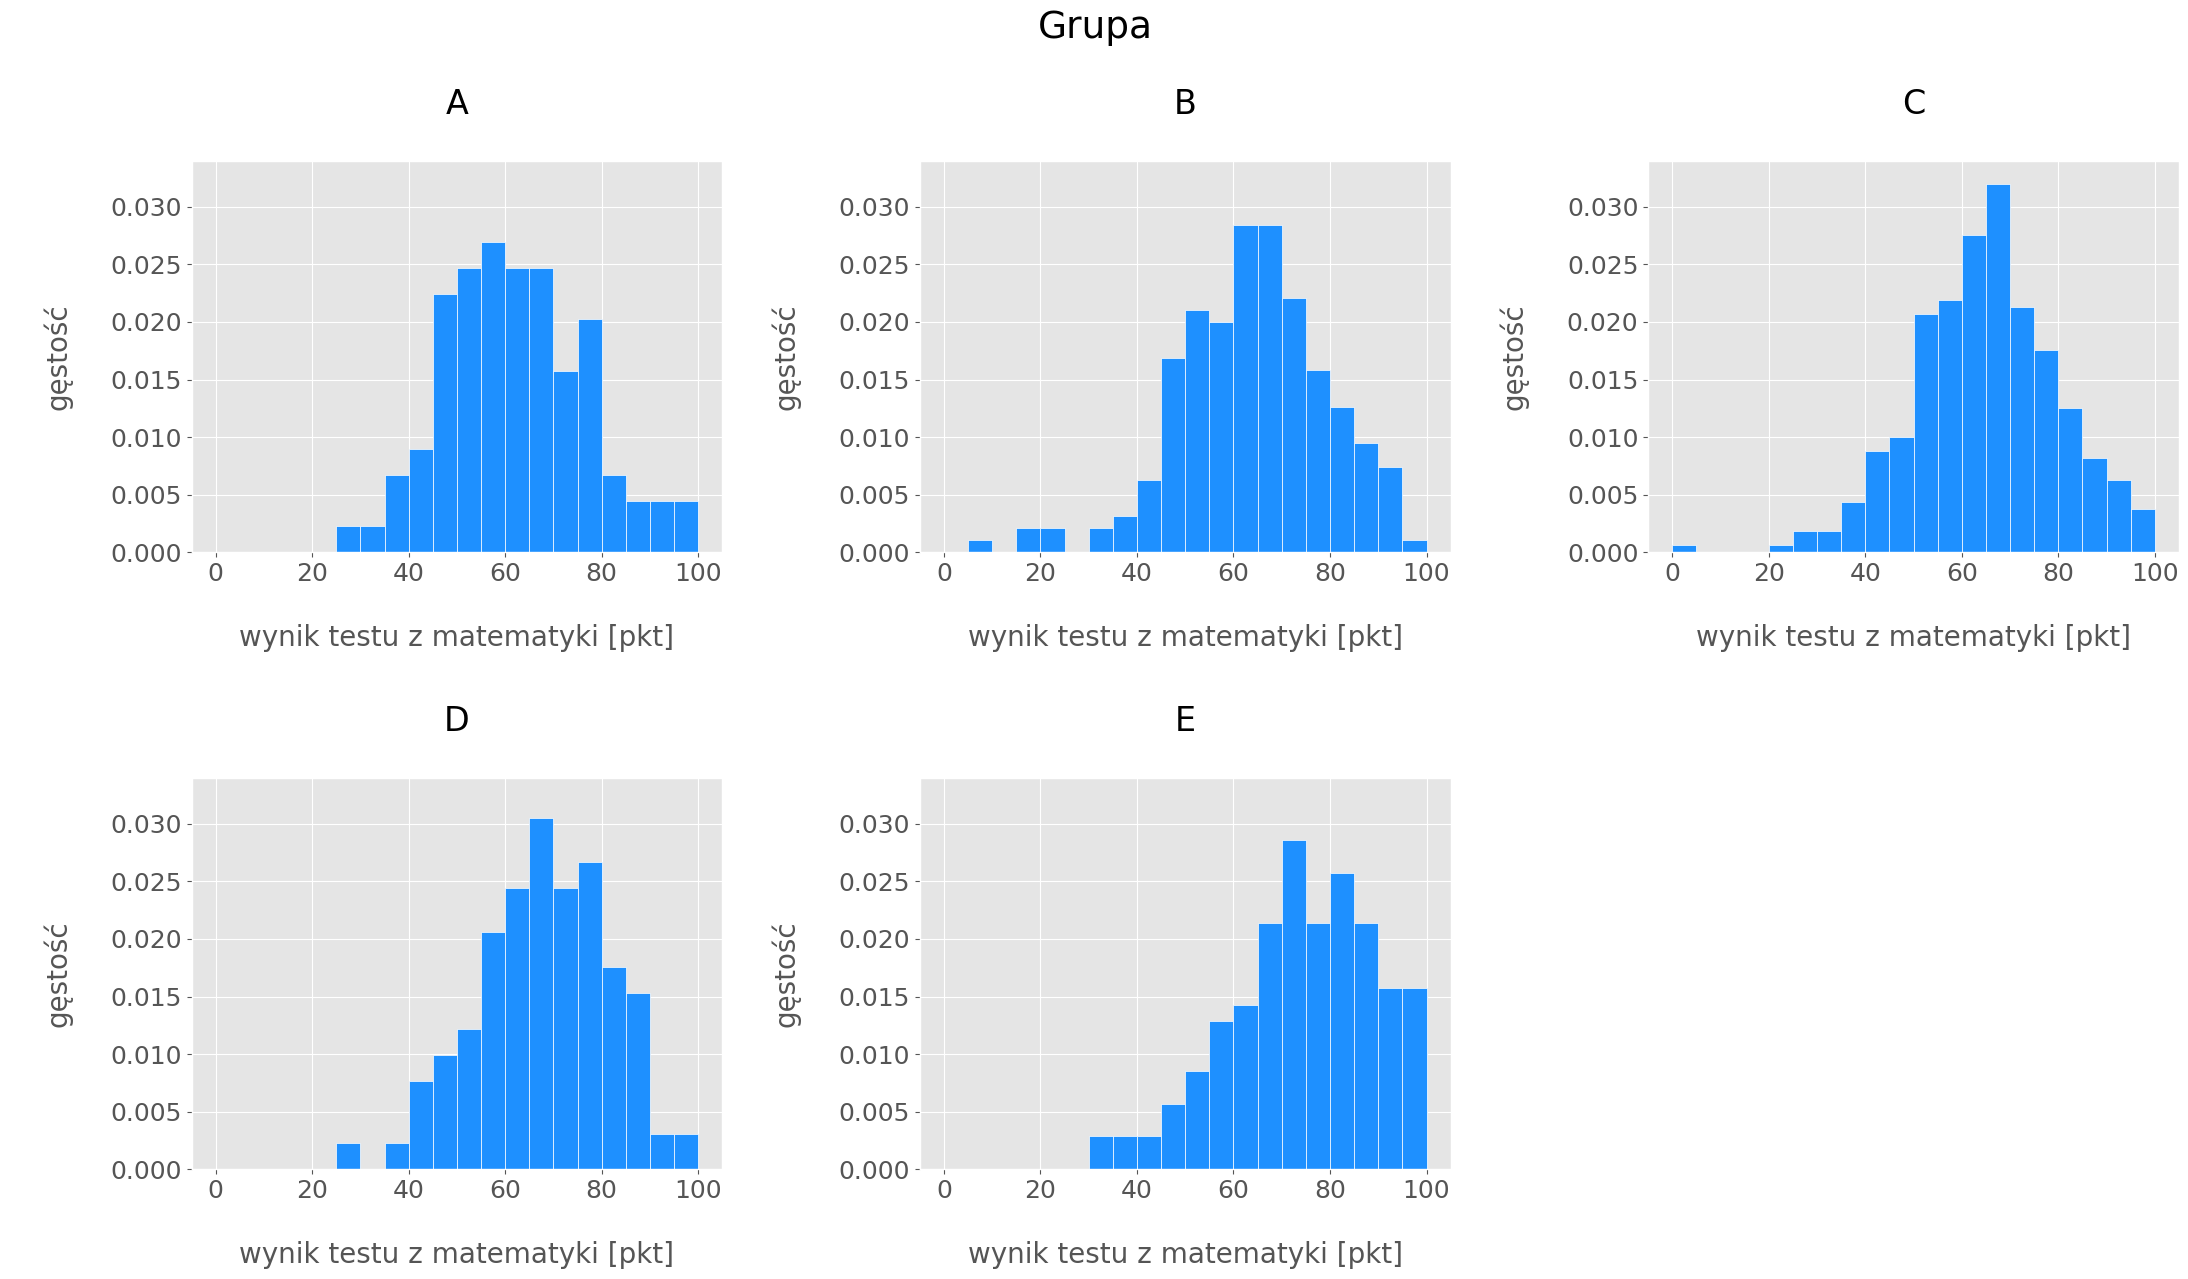

In [54]:
plt.figure(figsize = (22, 13))

for i, level in enumerate(np.sort(data_mapped[var_grouping].unique())):       # pętla po liczbach naturalnych (indeksach wykresów) i związanymi z nimi poziomami zmiennej grupującej
    plt.subplot(2, 3, i + 1)
    
    plt.title('\n' + level + '\n', size = 24)
    
    plt.hist(data_mapped.loc[data_mapped[var_grouping] == level, var_summed],
        bins      = np.arange(0, 101, 5),
        density   = True,
        color     = 'dodgerblue',
        edgecolor = 'white')
    plt.xlabel('\n' + var_summed_label, size = 20)
    plt.ylabel('\n' + 'gęstość' + '\n', size = 20)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.ylim(0, 0.034)
    

plt.suptitle(var_grouping_label, size = 27)


plt.tight_layout()
plt.savefig('panel_matematyka_grupa_petla.png', dpi = 300)
plt.show()

### Zmienna ilościowa vs zmienna porządkowa

Jeśli zmienną grupującą jest zmienna porządkowa, to listę jej poziomów wg zdefiniowanej kolejności można uzyskać przez "dane[zmienna].cat.categories" (a nie "np.sort(dane[zmienna].unique())", co daje kolejność alfabetyczną).

**Panel histogramów**

In [55]:
data_mapped = data                                                            # ramka ze zmienionymi poziomami zmiennej - tu akurat bez zmian

var_summed         = 'math score'                                             # nazwa zmiennej ilościowej
var_grouping       = 'parental level of education'                            # nazwa zmiennej porządkowej

var_summed_label   = 'wynik testu z matematyki [pkt]'                         # podpis zmiennej ilościowej (podpis osi x)
var_grouping_label = 'Wykształcenie rodziców [poziom]'                        # podpis zmiennej porządkowej (tytuł panelu)

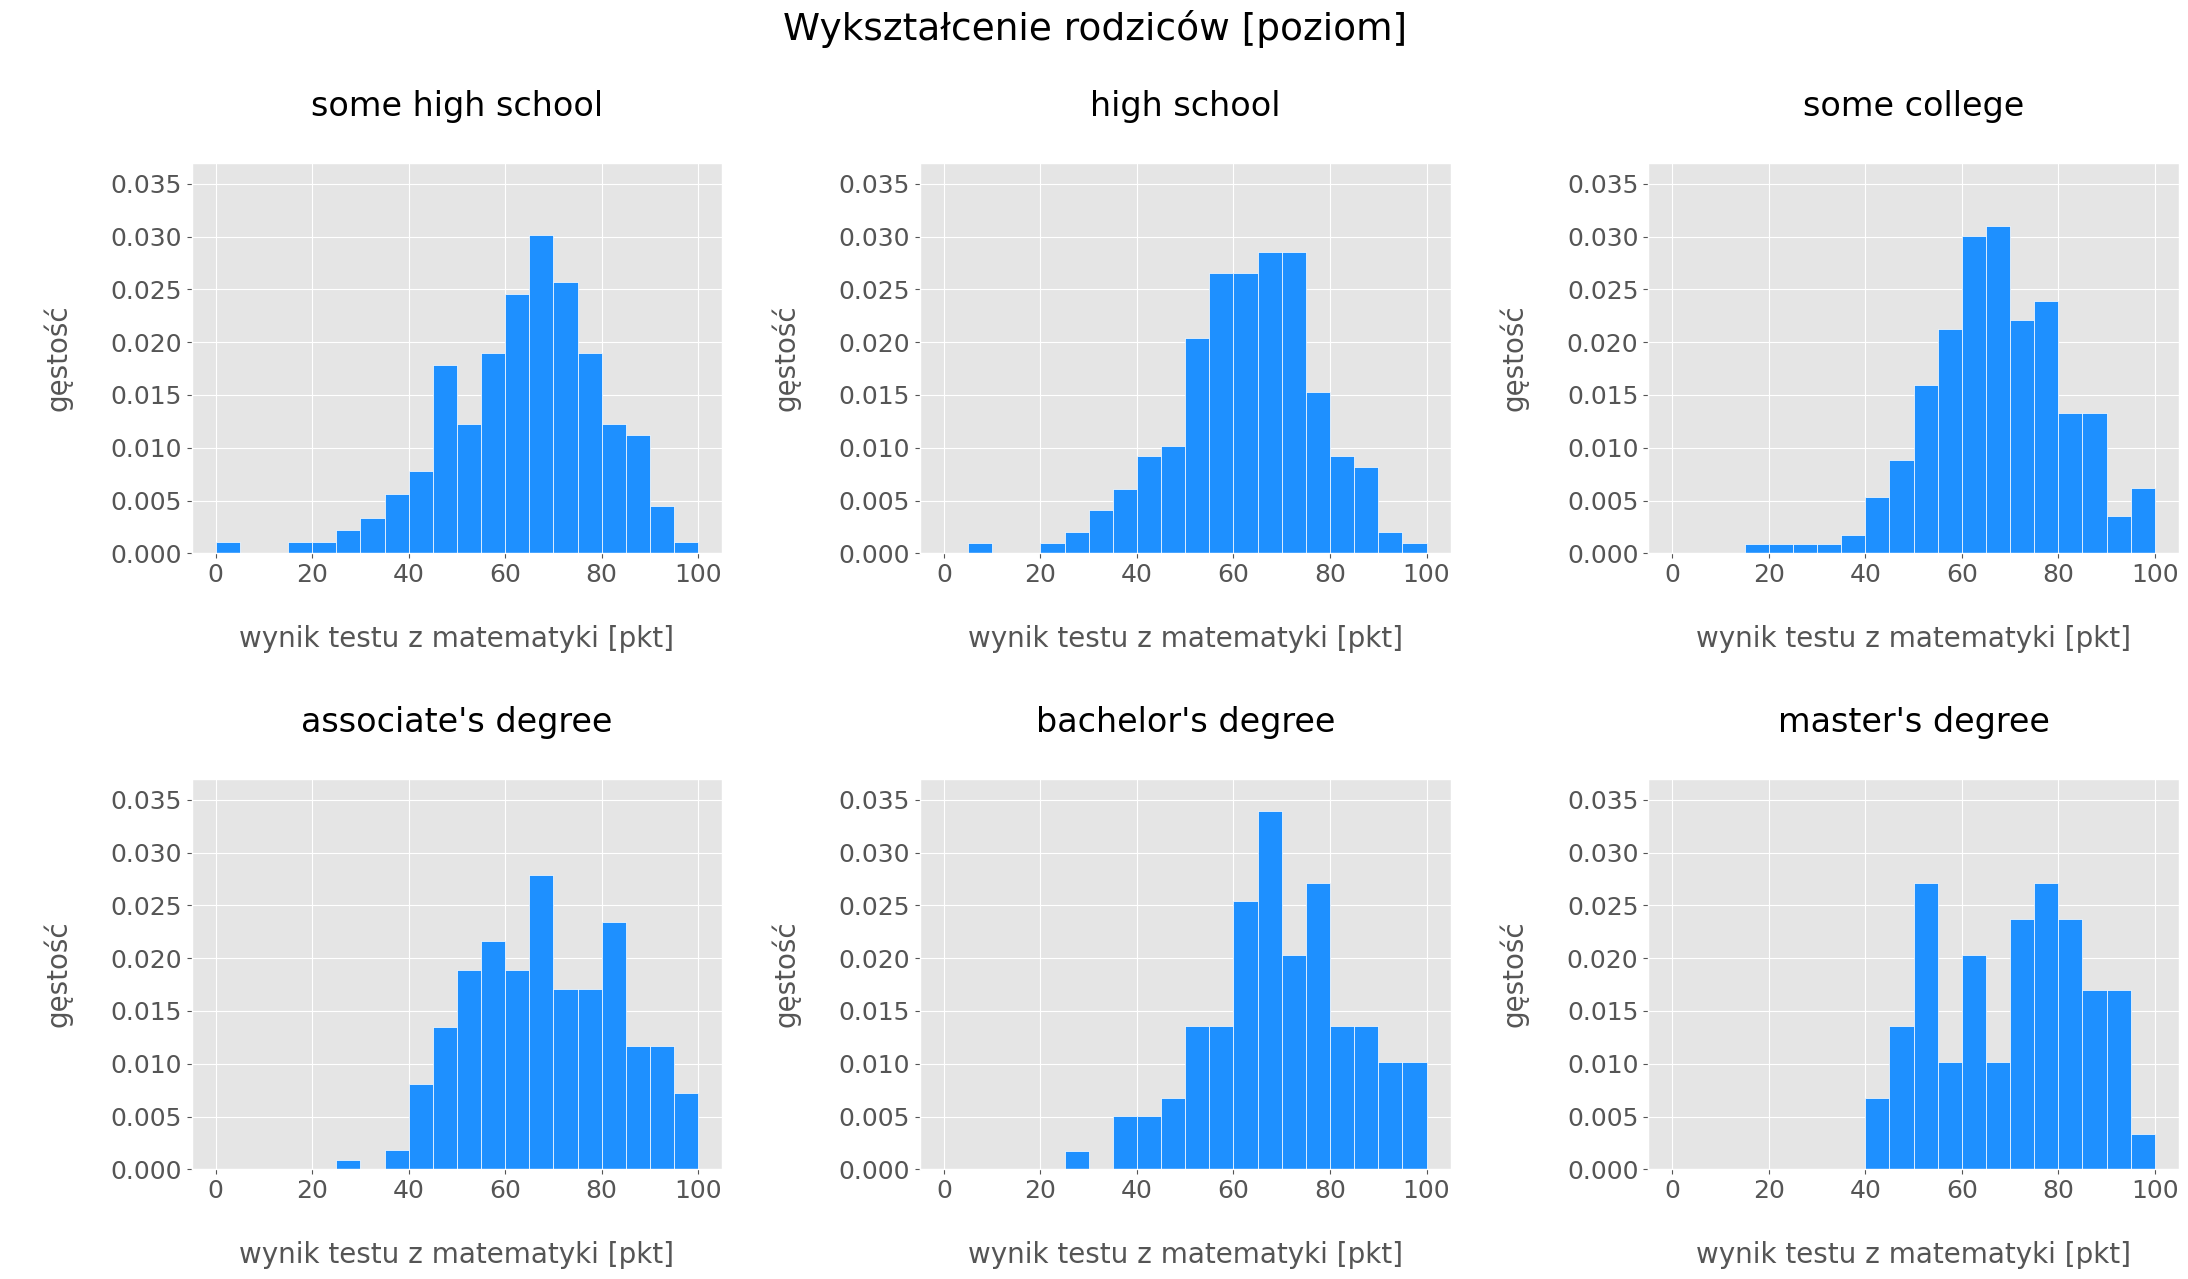

In [56]:
plt.figure(figsize = (22, 13))

for i, level in enumerate(data_mapped[var_grouping].cat.categories):          # pętla po liczbach naturalnych (indeksach wykresów) i związanymi z nimi poziomami zmiennej grupującej
    plt.subplot(2, 3, i + 1)
    
    plt.title('\n' + level + '\n', size = 24)
    
    plt.hist(data_mapped.loc[data_mapped[var_grouping] == level, var_summed],
        bins      = np.arange(0, 101, 5),
        density   = True,
        color     = 'dodgerblue',
        edgecolor = 'white')
    plt.xlabel('\n' + var_summed_label, size = 20)
    plt.ylabel('\n' + 'gęstość' + '\n', size = 20)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.ylim(0, 0.037)
    

plt.suptitle(var_grouping_label, size = 27)


plt.tight_layout()
plt.savefig('panel_matematyka_wyksztalcenie.png', dpi = 300)
plt.show()

### Zmienna porządkowa vs zmienna nominalna

Jeśli poziomy zmiennej porządkowej mają długie nazwy, dla ich czytelności można stworzyć odpowiednio wysoki panel lub zamieścić w etykietach słupków jedynie ich kolejne rangi (w poniższym przykładzie wynoszą one od 1 do 6), a ich pełne opisy załączyć w podpisie wykresu panelowego.

**Panel wykresów słupkowych**

In [57]:
data_mapped = data.assign(lunch = data['lunch'].map({'standard'    :'standardowy',   # ramka ze zmienionymi poziomami zmiennej
                                                     'free/reduced':'tańszy'}))      

var_summed         = 'parental level of education'                                   # nazwa zmiennej porządkowej
var_grouping       = 'lunch'                                                         # nazwa zmiennej nominalnej

var_summed_label   = 'wykształcenie rodziców [poziom]'                               # podpis zmiennej porządkowej (podpis osi x)
var_grouping_label = 'Lunch'                                                         # podpis zmiennej nominalnej (tytuł panelu)

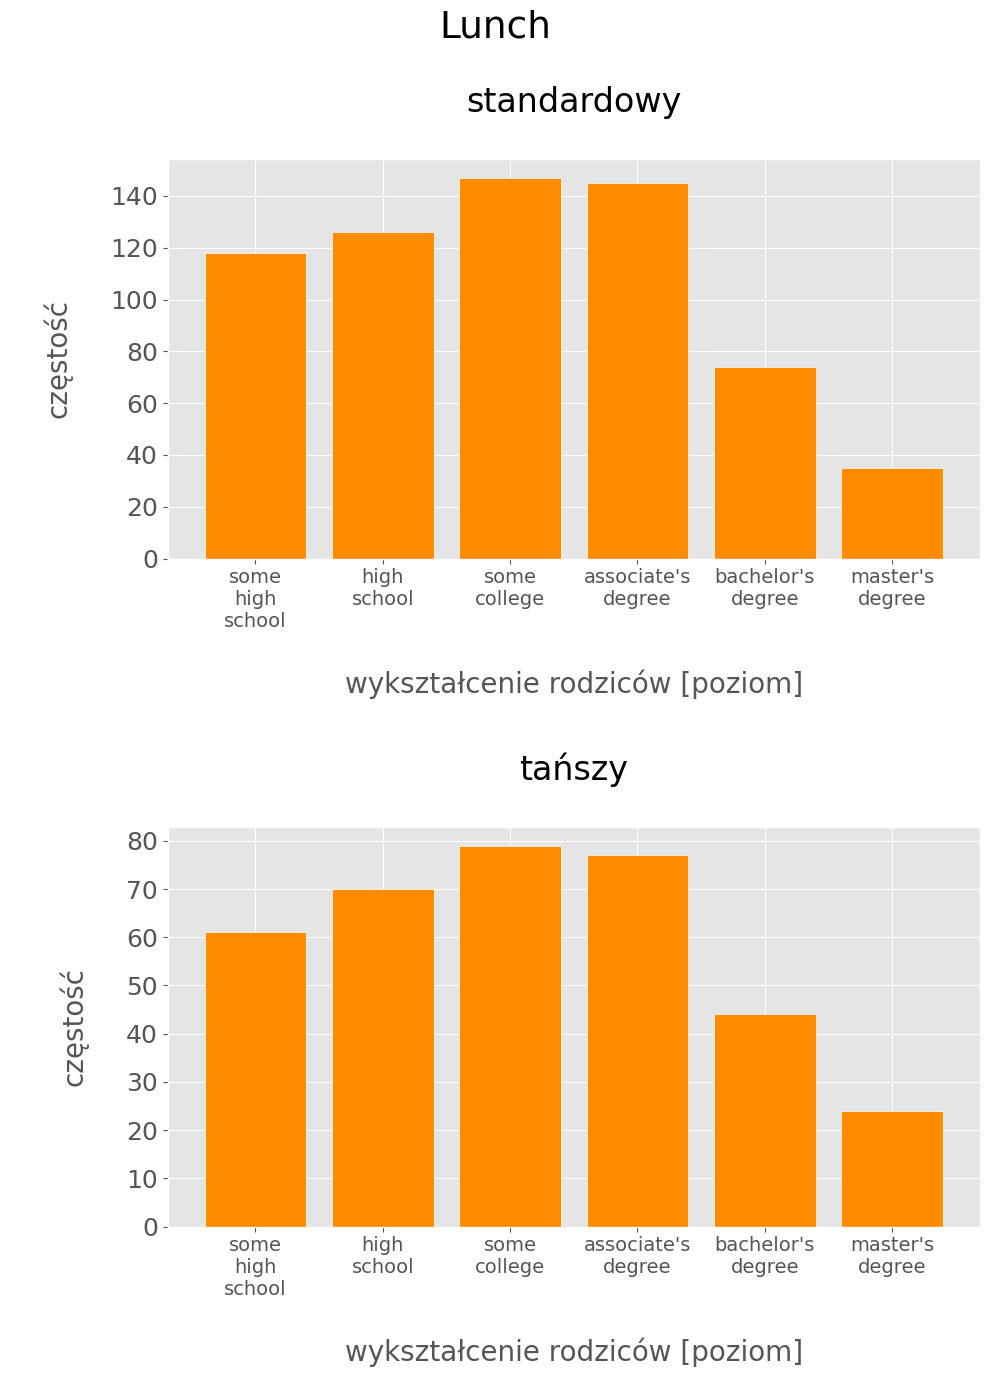

In [58]:
plt.figure(figsize = (10, 14))

for i, level in enumerate(np.sort(data_mapped[var_grouping].unique())):       
    plt.subplot(2, 1, i + 1)
    
    plt.title('\n' + level + '\n', size = 24)
    
    plt.bar(education_levels, data_mapped.loc[data_mapped[var_grouping] == level, var_summed].value_counts(sort = False),
            color     = 'darkorange',
            edgecolor = 'white')
    plt.xlabel('\n' + var_summed_label, size = 20)
    plt.ylabel('\n' + 'częstość' + '\n', size = 20)
    plt.xticks(size = 14)
    plt.yticks(size = 18)
    

plt.suptitle(var_grouping_label, size = 27)


plt.tight_layout()
plt.savefig('panel_wyksztalcenie_lunch.png', dpi = 300)
plt.show()

### Zmienna nominalna vs zmienna nominalna

**Panel wykresów kołowych**

W przypadku panelu wykresów kołowych może być dobrze zrobić wspólną legendę, aby nie powtarzać wielokrotnie tych samych etykiet.

In [59]:
data_mapped = data.assign(gender = data['gender'].map({'female':'kobiety',           # ramka ze zmienionymi poziomami zmiennej
                                                       'male'  :'mężczyźni'}),   
                          group  = data['race/ethnicity'].str[-1])

var_summed         = 'gender'                                                        # nazwa zmiennej nominalnej będącej na wykresie kołowym
var_grouping       = 'group'                                                         # nazwa zmiennej nominalnej grupującej

var_summed_label   = 'Płeć'                                                          # podpis zmiennej nominalnej będącej na wykresie kołowym (podpis legendy)
var_grouping_label = 'Grupa'                                                         # podpis zmiennej nominalnej grupującej (tytuł panelu)

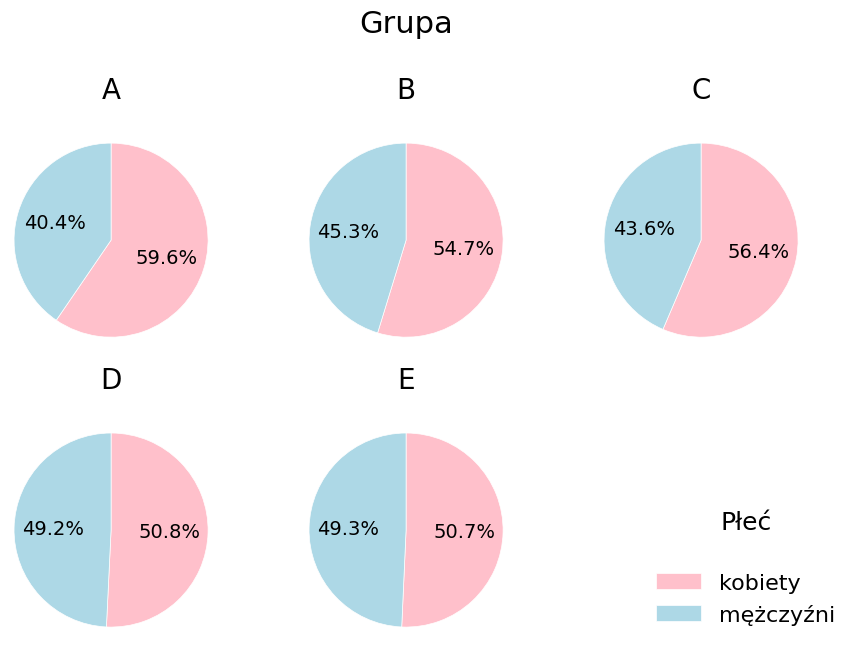

In [60]:
plt.figure(figsize = (9, 6.5))

for i, level in enumerate(np.sort(data_mapped[var_grouping].unique())):
    plt.subplot(2, 3, i + 1)

    plt.title('\n' + level + '\n', size = 20)
    
    plt.pie(data_mapped.loc[data_mapped[var_grouping] == level, var_summed].value_counts(),
            startangle   = 90,
            counterclock = False,
            autopct      = '%1.1f%%',
            radius       = 1.2,
            colors       = ['pink', 'lightblue'],
            wedgeprops   = {'edgecolor':'white'},
            textprops    = {'size':14})


plt.gcf().legend(np.sort(data_mapped[var_summed].unique()),           # legenda do wszystkich wykresów; gcf "wychodzi" z ostatniego subplot
                 title          = var_summed_label + '\n',
                 title_fontsize = 18,
                 fontsize       = 16,
                 frameon        = False,
                 loc            = 'lower right')                      # legenda w miejscu pustego pola w siatce

plt.suptitle(var_grouping_label, size = 22)


plt.tight_layout()
plt.savefig('panel_plec_grupa.png', dpi = 300)
plt.show()

W zależności od tego na czym na zależy możemy przy przedstawieniu takiego rozkładu, jako zmienną grupującą wybrać jedną lub drugą zmienną nominalną.

Poniżej znajduje się panel z tymi samymi zmiennymi, ale zamienionymi miejscami. Nie ma w nim pustego pola, więc legenda jest dodana z boku wykresu.

In [61]:
data_mapped = data.assign(gender = data['gender'].map({'female':'kobiety',
                                                       'male'  :'mężczyźni'}),
                          group  = data['race/ethnicity'].str[-1])

var_summed         = 'group'
var_grouping       = 'gender'

var_summed_label   = 'Grupa'
var_grouping_label = 'Płeć'

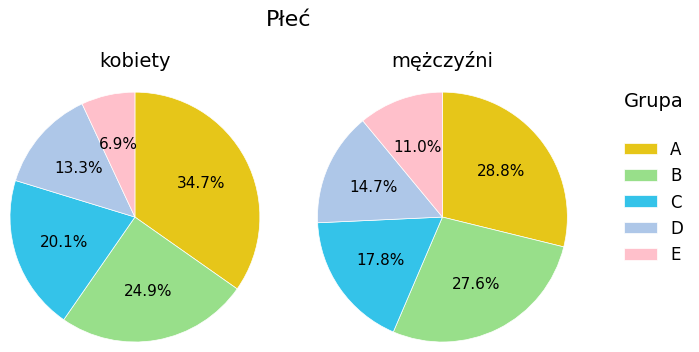

In [62]:
plt.figure(figsize = (6.3, 3.5))

for i, level in enumerate(np.sort(data_mapped[var_grouping].unique())):
    plt.subplot(1, 2, i + 1)

    plt.title('\n' + level + '\n', size = 14)
    
    plt.pie(data_mapped.loc[data_mapped[var_grouping] == level, var_summed].value_counts(),
            startangle   = 90,
            counterclock = False,
            autopct      = '%1.1f%%',
            radius       = 1.3,
            colors       = ['#e6c619', '#98df8a', '#34c3e9', '#aec7e8', '#ffc0cb'],
            wedgeprops   = {'edgecolor':'white'},
            textprops    = {'size':11})


plt.gcf().legend(np.sort(data_mapped[var_summed].unique()),
                 title          = var_summed_label + '\n',
                 title_fontsize = 14,
                 fontsize       = 12,
                 frameon        = False,
                 loc            = 'right',
                 bbox_to_anchor = (1.15, 0.5))               # przesunięcie legendy w punkt (1.15, 0.5) (w prawo od wykresów i w połowie wysokości)

plt.suptitle(var_grouping_label, size = 16)


plt.tight_layout()
plt.savefig('panel_grupa_plec.png', dpi = 300, bbox_inches = 'tight')    # zapis wykresu razem z legendą
plt.show()

---

# Wykresy rozkładów więcej niż 2 zmiennych

Aby uwzględnić na wykresie rozkładu kolejną zmienną można skorzystać z następujących, już wspomnianych wcześniej sposobów:
- zamieścić kilka rozkładów na jednym wykresie, dla każdego poziomu jednej ze zmiennych,
- zamieścić kilka wykresów na jednym panelu, dla każdego poziomu jednej ze zmiennych,
- dodanie dodatkowego wymiaru do wykresu dla jednej ze zmiennych.

W szczególności, w przypadku wykresu rozrzutu, możemy uwzględnić do dwóch dodatkowych zmiennych, poprzez zamianę arbitralnego koloru i rozmiaru punktów na elastyczne w zależności od wartości podanych zmiennych, odpowiednio zmiennej nominalnej i zmiennej ilościowej:

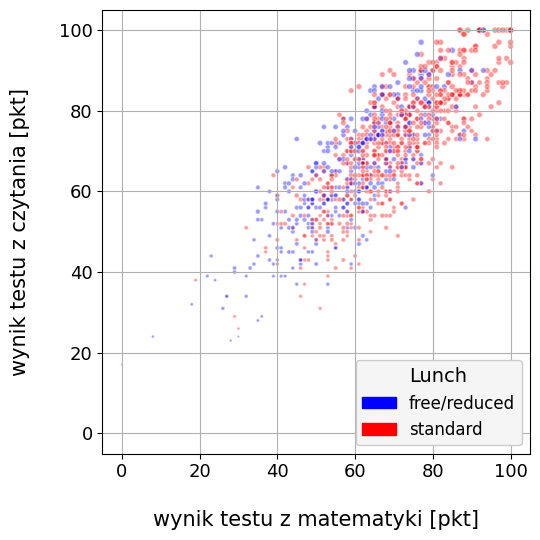

In [63]:
plt.style.use('default')

plt.figure(figsize = (5.5, 5.5)) 
plt.grid()


plt.scatter(data['math score'], data['reading score'],             
            color     = data['lunch'].map({'free/reduced':'blue',         # stały kolor punktów zamieniony na w zależności od zmiennej nominalnej
                                           'standard'    :'red'}),
            edgecolor = 'white',
            alpha     = 0.4,
            s         = data['writing score'] * 0.2)                      # stały rozmiar punktów zamieniony na w zależności od zmiennej ilościowej


import matplotlib.patches as mpatches

plt.legend(handles = [mpatches.Patch(label = 'free/reduced', color = 'blue'),     # "ręczne" dodanie legendy kolorów
                      mpatches.Patch(label = 'standard',     color = 'red')],
           title          = 'Lunch',
           title_fontsize = 14,
           fontsize       = 12,
           facecolor      = 'whitesmoke',
           framealpha     = 1,
           loc            = 'lower right')

plt.xlabel('\nwynik testu z matematyki [pkt]', size = 15)
plt.ylabel('wynik testu z czytania [pkt]\n',   size = 15)

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.ylim(-5, 105)

plt.tight_layout()
plt.savefig('rozrzutu_matematyka_czytanie_pisanie_lunch.png', dpi = 300)
plt.show()

plt.style.use('ggplot')